## Importing required libraries

In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


## Load the data

In [4]:
def load_csv():
    return pd.read_csv('Video_Games_Sales.csv')

## Accessing the dataframe

In [5]:
df = load_csv()
df.head()
# Number of Attributes in the Dataset: 16 Attributes
# NAME- Name of the video Game
# PLATFORM- Console on which the game is available
# YEAR_OF_RELEASE- Year in which it was released
# GENRE- Game's Category
# PUBLISHER- The company under which the game has been released
# NA_SALES- Game sales in North America (in millions of units)
# EU SALES- Game sales in European Union (in millions of units)
# JP_SALES- Game sales in Japan (in millions of units)
# OTHER_SALES- Game sales in the rest of the world, i.e. Africa, Asia 
# excluding Japan,Europe excluding the E.U. 
# GLOBAL_SALES- Total sales in the world (in millions of units)
# CRITIC_SCORE- Average Score given by professional critics
# CRITIC_COUNT- Number of Critics that Scored the game
# USER_SCORE- Average Score given by users
# USER_COUNT- Number of Users that Scored the game
# DEVELOPER- Developing company of the game 
# RATING- Suitable target audience rating; E(Everyone), E10+(Everyone 10+), T(Teen 13+), M(Mature +17)
#

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,Nintendo,E


## Get information about the dataframe

In [6]:
df.info()
# Year_of_Release has 78 missing values
# Publisher has 4 missing values
# Developer has 4 missing values
# Rating has 70 missing
#
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7017 non-null   object 
 1   Platform         7017 non-null   object 
 2   Year_of_Release  6939 non-null   float64
 3   Genre            7017 non-null   object 
 4   Publisher        7013 non-null   object 
 5   NA_Sales         7017 non-null   float64
 6   EU_Sales         7017 non-null   float64
 7   JP_Sales         7017 non-null   float64
 8   Other_Sales      7017 non-null   float64
 9   Global_Sales     7017 non-null   float64
 10  Critic_Score     7017 non-null   int64  
 11  Critic_Count     7017 non-null   int64  
 12  User_Score       7017 non-null   float64
 13  User_Count       7017 non-null   int64  
 14  Developer        7013 non-null   object 
 15  Rating           6947 non-null   object 
dtypes: float64(7), int64(3), object(6)
memory usage: 877.2+ KB


In [7]:
df["Genre"].value_counts()
# The value-counts() method gives the count of each catagory present in the attribute

Action          1677
Sports           973
Shooter          886
Role-Playing     721
Racing           598
Platform         407
Misc             396
Fighting         383
Simulation       306
Strategy         284
Adventure        265
Puzzle           121
Name: Genre, dtype: int64

In [8]:
df["Year_of_Release"].value_counts()

2008.0    600
2007.0    596
2005.0    566
2009.0    555
2006.0    531
2003.0    505
2004.0    480
2011.0    475
2002.0    459
2010.0    433
2012.0    321
2013.0    273
2001.0    257
2014.0    256
2016.0    227
2015.0    221
2000.0    102
1999.0     30
1998.0     26
1997.0     14
1996.0      8
1994.0      1
1985.0      1
1992.0      1
1988.0      1
Name: Year_of_Release, dtype: int64

In [9]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6939.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000
mean,2007.477014,0.389290,0.233095,0.062951,0.081525,0.767049,70.249822,28.783241,7.182428,173.432664
std,4.231331,0.957051,0.679210,0.284162,0.266594,1.940317,13.880646,19.167119,1.441241,581.977516
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,24.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


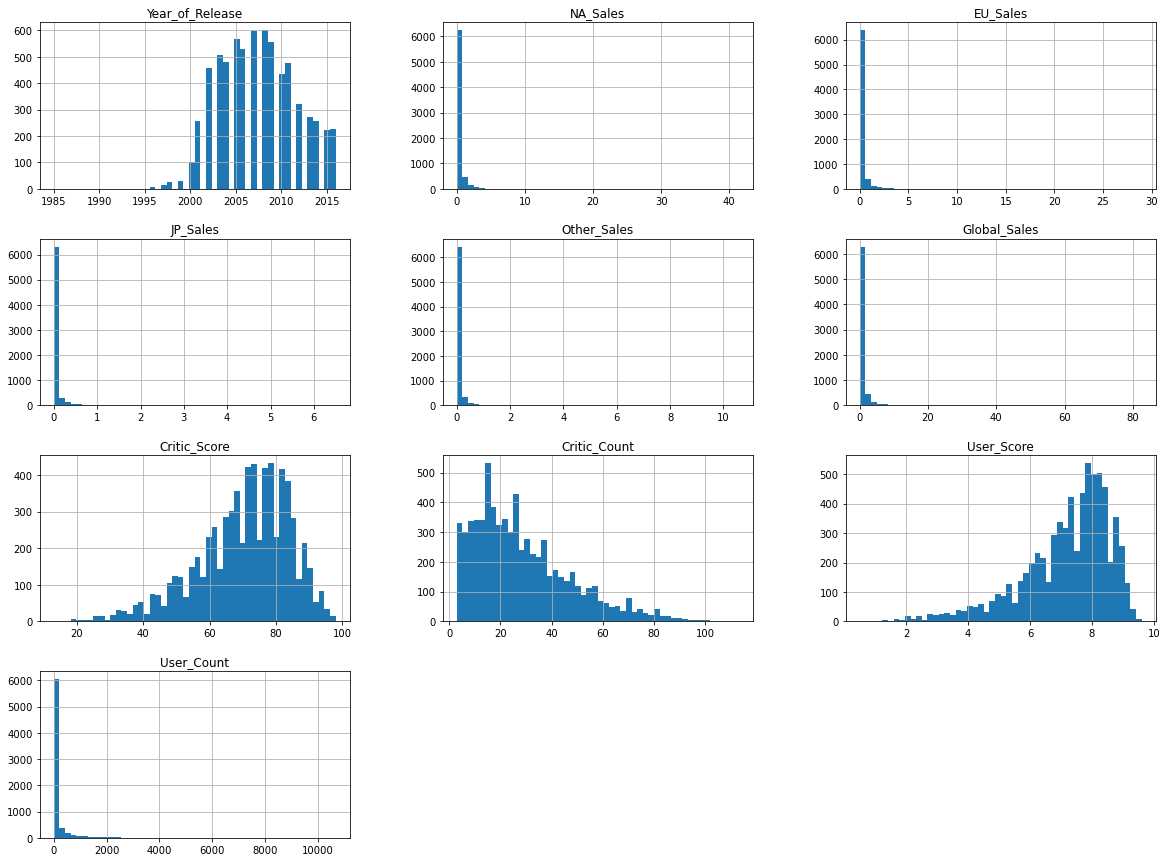

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()
# The year of release with the most unit sales is 2008 with 600 million units,
# followed by 2007 with 596 million units and 1988, 1985, 1992, 1994 with the lowest at 1 million units each
# 
#
#
#

<AxesSubplot:xlabel='NA_Sales', ylabel='Year_of_Release'>

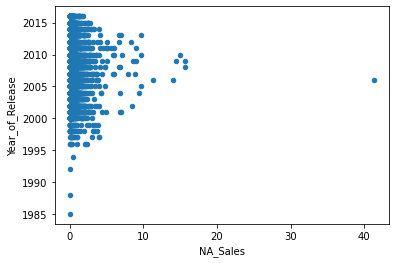

In [11]:
df.plot(kind="scatter", x="NA_Sales", y="Year_of_Release")

##  Visualizing Geographical Data

<AxesSubplot:xlabel='JP_Sales', ylabel='Genre'>

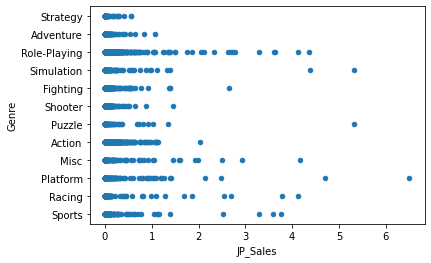

In [12]:
df.plot(kind="scatter", x="JP_Sales", y="Genre")

<AxesSubplot:xlabel='EU_Sales', ylabel='Genre'>

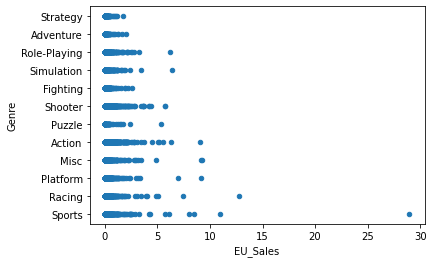

In [13]:
df.plot(kind="scatter", x="EU_Sales", y="Genre")

<AxesSubplot:xlabel='Other_Sales', ylabel='Genre'>

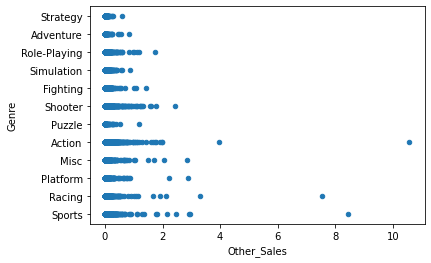

In [14]:
df.plot(kind="scatter", x="Other_Sales", y="Genre")

<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

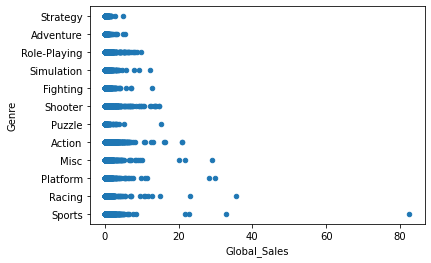

In [15]:
df.plot(kind="scatter", x="Global_Sales", y="Genre")

<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

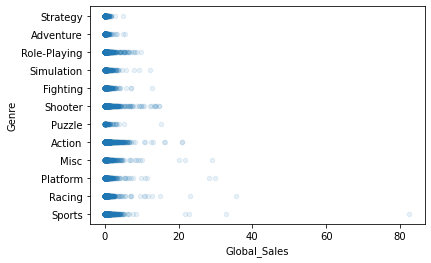

In [16]:
df.plot(kind="scatter", x="Global_Sales", y="Genre", alpha=0.1)

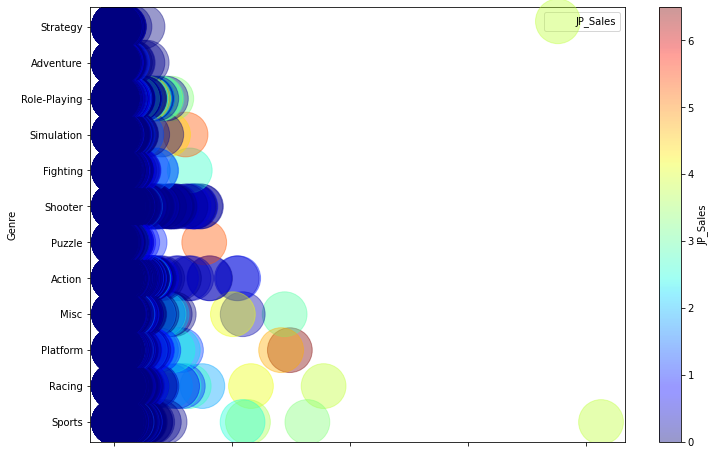

In [17]:
df.plot(kind="scatter", x="Global_Sales", y="Genre", alpha=0.4,
    s=df["Year_of_Release"], label= "JP_Sales",figsize=(12,8),
    c="JP_Sales", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

## Top Ten Bst Selling Games Regionally 

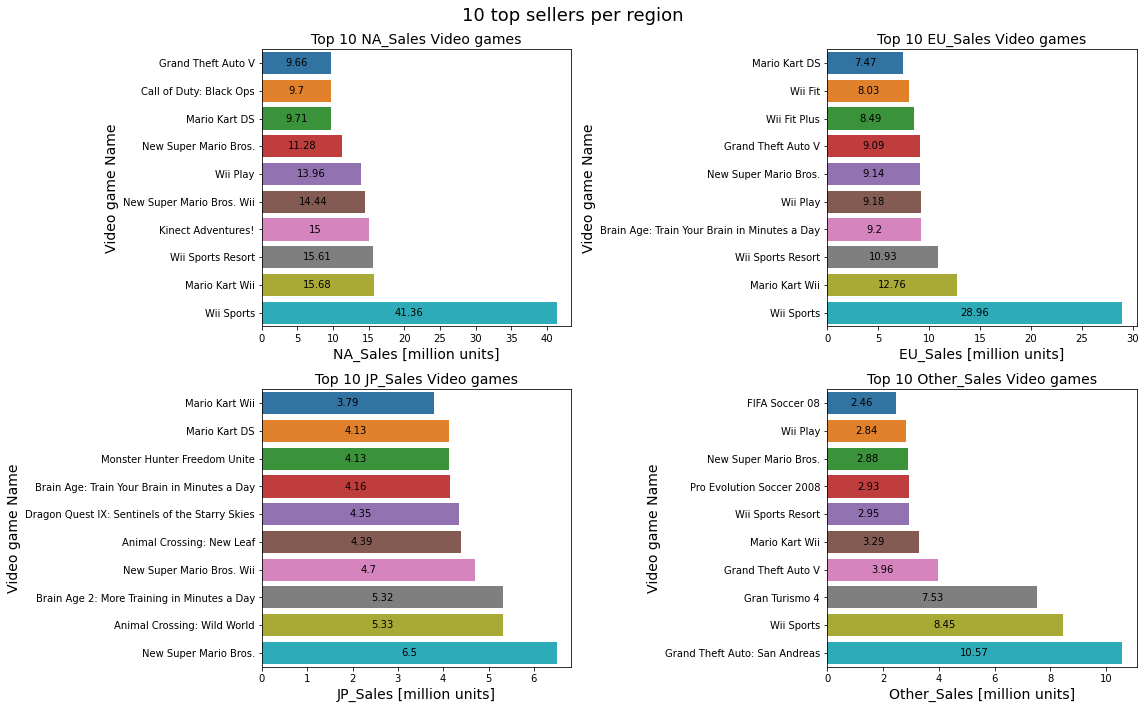

In [18]:
sales_regions = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
fig,axes = plt.subplots(int(len(sales_regions)/2),int(len(sales_regions)/2), figsize=(16,10))
axes = axes.ravel() #Required for array typing ???
for index, region in enumerate(sales_regions):
    data_sales_sort = df.sort_values(by=region, ascending=True)
    sns.barplot(x=data_sales_sort[region].tail(10),y=data_sales_sort['Name'].tail(10), ax=axes[index])
    axes[index].set_title(f'Top 10 {region} Video games', fontsize = 14)
    axes[index].set_xlabel(f'{region} [million units]', fontsize = 14)
    axes[index].set_ylabel('Video game Name', fontsize = 14)
    axes[index].bar_label(axes[index].containers[0], label_type='center')
    
plt.suptitle('10 top sellers per region', fontsize = 18)
plt.tight_layout()
plt.show()

# Shayma's Done

# Code from "https://www.kaggle.com/code/baptisteadn/a-brief-analysis-of-video-games-sales/notebook"

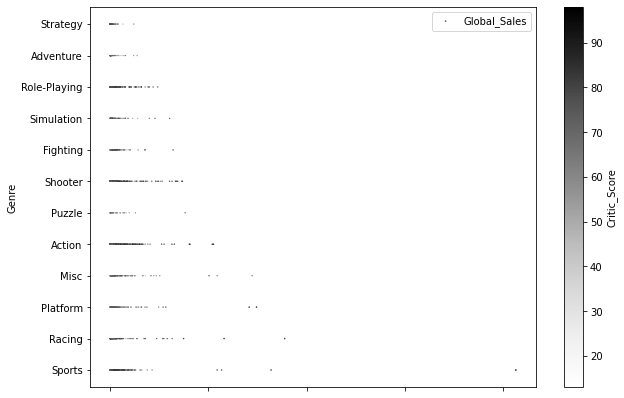

In [24]:
df.plot(kind="scatter", x="Global_Sales", y="Genre",
    s=df["Global_Sales"]/100, label="Global_Sales", figsize=(10,7),
    c="Critic_Score", colorbar=True,
)
plt.legend()

In [26]:
corr_matrix = df.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [27]:
corr_matrix["Global_Sales"].sort_values(ascending=False)

Global_Sales       1.000000
NA_Sales           0.955487
EU_Sales           0.938667
Other_Sales        0.804513
JP_Sales           0.612539
Critic_Count       0.289301
User_Count         0.262935
Critic_Score       0.236953
User_Score         0.088583
Year_of_Release    0.002078
Name: Global_Sales, dtype: float64

array([[<AxesSubplot:xlabel='Global_Sales', ylabel='Global_Sales'>,
        <AxesSubplot:xlabel='User_Count', ylabel='Global_Sales'>,
        <AxesSubplot:xlabel='Critic_Score', ylabel='Global_Sales'>,
        <AxesSubplot:xlabel='Year_of_Release', ylabel='Global_Sales'>],
       [<AxesSubplot:xlabel='Global_Sales', ylabel='User_Count'>,
        <AxesSubplot:xlabel='User_Count', ylabel='User_Count'>,
        <AxesSubplot:xlabel='Critic_Score', ylabel='User_Count'>,
        <AxesSubplot:xlabel='Year_of_Release', ylabel='User_Count'>],
       [<AxesSubplot:xlabel='Global_Sales', ylabel='Critic_Score'>,
        <AxesSubplot:xlabel='User_Count', ylabel='Critic_Score'>,
        <AxesSubplot:xlabel='Critic_Score', ylabel='Critic_Score'>,
        <AxesSubplot:xlabel='Year_of_Release', ylabel='Critic_Score'>],
       [<AxesSubplot:xlabel='Global_Sales', ylabel='Year_of_Release'>,
        <AxesSubplot:xlabel='User_Count', ylabel='Year_of_Release'>,
        <AxesSubplot:xlabel='Critic_Score', yl

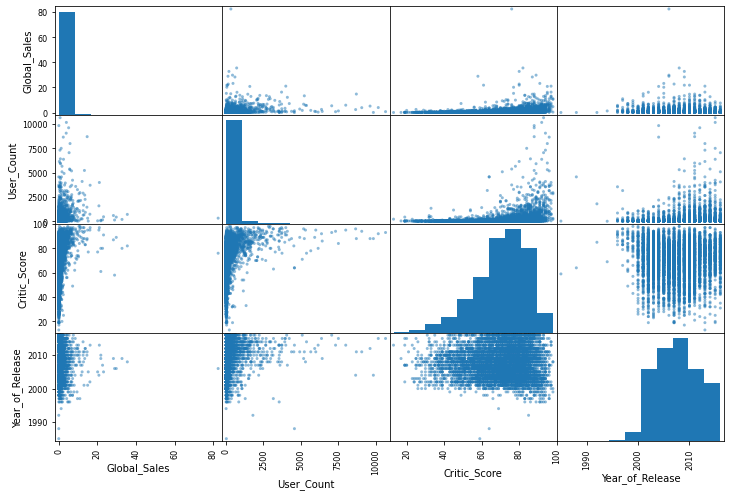

In [35]:
from pandas.plotting import scatter_matrix

attributes = ["Global_Sales", "User_Count", "Critic_Score", "Year_of_Release"]
scatter_matrix(df[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other

(0.0, 10.0, 0.0, 2000.0)

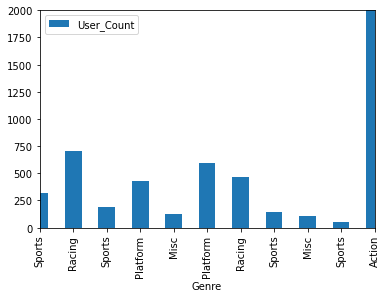

In [45]:
df.plot(kind="bar", x="Genre", y="User_Count")
plt.axis([0, 10, 0, 2000])